## Pandas / Matplotlib: case COVID-19
Matplotlib is the most commonly used Python library for visualizing data. See https://jakevdp.github.io/PythonDataScienceHandbook/, a free online book by Jake Van der Plas, that covers a.o. pandas, matplotlib and machine learning.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# First we read the dataset into a dataframe. Pandas works best if the complete dataset fits into memory. 
coviddata = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

In [ ]:
# Print the first 5 (default value) records
coviddata.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/10/2020,27,10,2020,199,8,Afghanistan,AF,AFG,38041757.0,Asia,2.902074
1,26/10/2020,26,10,2020,65,3,Afghanistan,AF,AFG,38041757.0,Asia,2.718066
2,25/10/2020,25,10,2020,81,4,Afghanistan,AF,AFG,38041757.0,Asia,2.799555
3,24/10/2020,24,10,2020,61,2,Afghanistan,AF,AFG,38041757.0,Asia,2.586631
4,23/10/2020,23,10,2020,116,4,Afghanistan,AF,AFG,38041757.0,Asia,2.452568


In [ ]:
# Print the first 10 records
coviddata.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/10/2020,27,10,2020,199,8,Afghanistan,AF,AFG,38041757.0,Asia,2.902074
1,26/10/2020,26,10,2020,65,3,Afghanistan,AF,AFG,38041757.0,Asia,2.718066
2,25/10/2020,25,10,2020,81,4,Afghanistan,AF,AFG,38041757.0,Asia,2.799555
3,24/10/2020,24,10,2020,61,2,Afghanistan,AF,AFG,38041757.0,Asia,2.586631
4,23/10/2020,23,10,2020,116,4,Afghanistan,AF,AFG,38041757.0,Asia,2.452568
5,22/10/2020,22,10,2020,135,2,Afghanistan,AF,AFG,38041757.0,Asia,2.350049
6,21/10/2020,21,10,2020,88,2,Afghanistan,AF,AFG,38041757.0,Asia,2.173927
7,20/10/2020,20,10,2020,87,5,Afghanistan,AF,AFG,38041757.0,Asia,2.105581
8,19/10/2020,19,10,2020,59,4,Afghanistan,AF,AFG,38041757.0,Asia,2.258045
9,18/10/2020,18,10,2020,68,3,Afghanistan,AF,AFG,38041757.0,Asia,2.218615


In [ ]:
# Exercise: Print the last 5 (default value) records
coviddata.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
51678,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51679,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51680,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51681,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51682,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
# Exercise: Print the last 15 records
coviddata.tail(15)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
51668,04/04/2020,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624
51669,03/04/2020,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624
51670,02/04/2020,2,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51671,01/04/2020,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51672,31/03/2020,31,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51673,30/03/2020,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51674,29/03/2020,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51675,28/03/2020,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51676,27/03/2020,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51677,26/03/2020,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
# Names of the columns
coviddata.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [ ]:
# What is the index?
coviddata.index

RangeIndex(start=0, stop=51683, step=1)

In [ ]:
# This is an easy way to check if there are some columns with missing data.
# E.g. CountryterritoryCode is 51398 and most other values are 51472
coviddata.count()

dateRep                                                       51683
day                                                           51683
month                                                         51683
year                                                          51683
cases                                                         51683
deaths                                                        51683
countriesAndTerritories                                       51683
geoId                                                         51456
countryterritoryCode                                          51608
popData2019                                                   51608
continentExp                                                  51683
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    48879
dtype: int64

In [ ]:
# The dimensions of the dataframe
coviddata.shape

(51683, 12)

In [ ]:
# General statistical information on numeric fields
coviddata.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,51683.000000,51683.000000,51683.000000,51683.000000,51683.000000,5.160800e+04,48879.000000
mean,15.885436,6.249966,2019.998704,843.566221,22.463770,4.191034e+07,42.494551
std,8.739709,2.515775,0.035982,4843.344797,124.707584,1.554610e+08,100.455527
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.324820e+06,0.529216
50%,16.000000,6.000000,2020.000000,12.000000,0.000000,8.082359e+06,5.464659
75%,23.000000,8.000000,2020.000000,191.000000,3.000000,2.860872e+07,37.063642
max,31.000000,12.000000,2020.000000,97894.000000,4928.000000,1.433784e+09,1761.686598


In [ ]:
# Checking the data types of the columns
coviddata.dtypes
# You can see that dateRep is an object and not datetype. We will have to change this.

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

In [ ]:
# We have to cast the dateRep from object to datetime
from datetime import datetime
coviddata['dateRep'] = pd.to_datetime(coviddata['dateRep'], format='%d/%m/%Y')
coviddata.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-10-27,27,10,2020,199,8,Afghanistan,AF,AFG,38041757.0,Asia,2.902074
1,2020-10-26,26,10,2020,65,3,Afghanistan,AF,AFG,38041757.0,Asia,2.718066
2,2020-10-25,25,10,2020,81,4,Afghanistan,AF,AFG,38041757.0,Asia,2.799555
3,2020-10-24,24,10,2020,61,2,Afghanistan,AF,AFG,38041757.0,Asia,2.586631
4,2020-10-23,23,10,2020,116,4,Afghanistan,AF,AFG,38041757.0,Asia,2.452568


In [ ]:
# Checking the data types of the columns again
coviddata.dtypes
# You can see that dateRep is an object and not datetype. We will have to change this.

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [ ]:
# The column name countriesAndTerritories and Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 are quite long, let's rename both
coviddata.rename(columns={'countriesAndTerritories':'country', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'cum_number_14_days_cases_per_100000'}, inplace=True)
coviddata.head()

,dateRep,day,month,year,cases,deaths,country,geoId,countryterritoryCode,popData2019,continentExp,cum_number_14_days_cases_per_100000
0,2020-10-27,27,10,2020,199,8,Afghanistan,AF,AFG,38041757.0,Asia,2.902074
1,2020-10-26,26,10,2020,65,3,Afghanistan,AF,AFG,38041757.0,Asia,2.718066
2,2020-10-25,25,10,2020,81,4,Afghanistan,AF,AFG,38041757.0,Asia,2.799555
3,2020-10-24,24,10,2020,61,2,Afghanistan,AF,AFG,38041757.0,Asia,2.586631
4,2020-10-23,23,10,2020,116,4,Afghanistan,AF,AFG,38041757.0,Asia,2.452568


In [ ]:
# We have duplicate data: geoId, vs countryterritoryCode => drop geoId
# axis = 1 is necessary to indicate we want to delete columns (use axis = 0 for row based deletion) 
# If you only want to drop more 1 column, you don't really need square brackets
coviddata = coviddata.drop(['geoId'], axis = 1)
coviddata.head()

,dateRep,day,month,year,cases,deaths,country,countryterritoryCode,popData2019,continentExp,cum_number_14_days_cases_per_100000
0,2020-10-27,27,10,2020,199,8,Afghanistan,AFG,38041757.0,Asia,2.902074
1,2020-10-26,26,10,2020,65,3,Afghanistan,AFG,38041757.0,Asia,2.718066
2,2020-10-25,25,10,2020,81,4,Afghanistan,AFG,38041757.0,Asia,2.799555
3,2020-10-24,24,10,2020,61,2,Afghanistan,AFG,38041757.0,Asia,2.586631
4,2020-10-23,23,10,2020,116,4,Afghanistan,AFG,38041757.0,Asia,2.452568


In [ ]:
# Excercise: drop the columns day and countryterritoryCode
coviddata = coviddata.drop(['day', 'countryterritoryCode'], axis = 1)
coviddata.head()

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
0,2020-10-27,10,2020,199,8,Afghanistan,38041757.0,Asia,2.902074
1,2020-10-26,10,2020,65,3,Afghanistan,38041757.0,Asia,2.718066
2,2020-10-25,10,2020,81,4,Afghanistan,38041757.0,Asia,2.799555
3,2020-10-24,10,2020,61,2,Afghanistan,38041757.0,Asia,2.586631
4,2020-10-23,10,2020,116,4,Afghanistan,38041757.0,Asia,2.452568


In [ ]:
# What are the unique values for country
coviddata['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [ ]:
# How many unique values for country?
len(coviddata['country'].unique())

212

In [ ]:
# FILTERING
# Find all lines from Belgium
coviddata[coviddata['country'] == 'Belgium']

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
4623,2020-10-27,10,2020,8,25,Belgium,11455519.0,Europe,1390.875437
4624,2020-10-26,10,2020,1485,66,Belgium,11455519.0,Europe,1398.932689
4625,2020-10-25,10,2020,7187,70,Belgium,11455519.0,Europe,1373.783239
4626,2020-10-24,10,2020,14560,85,Belgium,11455519.0,Europe,1314.623982
4627,2020-10-23,10,2020,15085,53,Belgium,11455519.0,Europe,1240.423939
...,...,...,...,...,...,...,...,...,...
4920,2020-01-04,1,2020,0,0,Belgium,11455519.0,Europe,NaN
4921,2020-01-03,1,2020,0,0,Belgium,11455519.0,Europe,NaN
4922,2020-01-02,1,2020,0,0,Belgium,11455519.0,Europe,NaN
4923,2020-01-01,1,2020,0,0,Belgium,11455519.0,Europe,NaN


In [ ]:
# Find all lines for the Benelux.
# You don't know what the exact name is for The Netherlands
# You could first try to find countries from Europe
coviddata[coviddata['continentExp']=='Europe']

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
292,2020-10-27,10,2020,288,3,Albania,2862427.0,Europe,135.374631
293,2020-10-26,10,2020,299,4,Albania,2862427.0,Europe,131.287191
294,2020-10-25,10,2020,302,4,Albania,2862427.0,Europe,126.710655
295,2020-10-24,10,2020,306,4,Albania,2862427.0,Europe,121.924507
296,2020-10-23,10,2020,302,3,Albania,2862427.0,Europe,117.068488
...,...,...,...,...,...,...,...,...,...
49116,2020-01-04,1,2020,0,0,United_Kingdom,66647112.0,Europe,NaN
49117,2020-01-03,1,2020,0,0,United_Kingdom,66647112.0,Europe,NaN
49118,2020-01-02,1,2020,0,0,United_Kingdom,66647112.0,Europe,NaN
49119,2020-01-01,1,2020,0,0,United_Kingdom,66647112.0,Europe,NaN


In [ ]:
# This doesn't help us to find the correct name of The Netherlands, so we try it in another way
coviddata[coviddata['country'].str.contains('etherlands')]

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
33595,2020-10-27,10,2020,10324,26,Netherlands,17282163.0,Europe,694.097145
33596,2020-10-26,10,2020,10194,27,Netherlands,17282163.0,Europe,673.960777
33597,2020-10-25,10,2020,8639,55,Netherlands,17282163.0,Europe,651.822344
33598,2020-10-24,10,2020,9983,45,Netherlands,17282163.0,Europe,639.404917
33599,2020-10-23,10,2020,9268,46,Netherlands,17282163.0,Europe,616.120795
...,...,...,...,...,...,...,...,...,...
33892,2020-01-04,1,2020,0,0,Netherlands,17282163.0,Europe,NaN
33893,2020-01-03,1,2020,0,0,Netherlands,17282163.0,Europe,NaN
33894,2020-01-02,1,2020,0,0,Netherlands,17282163.0,Europe,NaN
33895,2020-01-01,1,2020,0,0,Netherlands,17282163.0,Europe,NaN


In [ ]:
# Find all lines for the Benelux
coviddata[coviddata['country'].isin(['Belgium','Netherlands', 'Luxembourg'])]

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
4623,2020-10-27,10,2020,8,25,Belgium,11455519.0,Europe,1390.875437
4624,2020-10-26,10,2020,1485,66,Belgium,11455519.0,Europe,1398.932689
4625,2020-10-25,10,2020,7187,70,Belgium,11455519.0,Europe,1373.783239
4626,2020-10-24,10,2020,14560,85,Belgium,11455519.0,Europe,1314.623982
4627,2020-10-23,10,2020,15085,53,Belgium,11455519.0,Europe,1240.423939
...,...,...,...,...,...,...,...,...,...
33892,2020-01-04,1,2020,0,0,Netherlands,17282163.0,Europe,NaN
33893,2020-01-03,1,2020,0,0,Netherlands,17282163.0,Europe,NaN
33894,2020-01-02,1,2020,0,0,Netherlands,17282163.0,Europe,NaN
33895,2020-01-01,1,2020,0,0,Netherlands,17282163.0,Europe,NaN


In [ ]:
# Find all lines where the number of deaths is not 0
coviddata[~(coviddata['deaths'] == 0)]

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
0,2020-10-27,10,2020,199,8,Afghanistan,38041757.0,Asia,2.902074
1,2020-10-26,10,2020,65,3,Afghanistan,38041757.0,Asia,2.718066
2,2020-10-25,10,2020,81,4,Afghanistan,38041757.0,Asia,2.799555
3,2020-10-24,10,2020,61,2,Afghanistan,38041757.0,Asia,2.586631
4,2020-10-23,10,2020,116,4,Afghanistan,38041757.0,Asia,2.452568
...,...,...,...,...,...,...,...,...,...
51590,2020-06-21,6,2020,7,2,Zimbabwe,14645473.0,Africa,1.413406
51647,2020-04-25,4,2020,0,1,Zimbabwe,14645473.0,Africa,0.122905
51662,2020-04-10,4,2020,0,1,Zimbabwe,14645473.0,Africa,0.054624
51663,2020-04-09,4,2020,1,1,Zimbabwe,14645473.0,Africa,0.054624


In [ ]:
# Find all lines where the number of deaths is not 0 and country is Belgium
coviddata[~(coviddata['deaths'] == 0) & (coviddata['country'] == 'Belgium')]

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
4623,2020-10-27,10,2020,8,25,Belgium,11455519.0,Europe,1390.875437
4624,2020-10-26,10,2020,1485,66,Belgium,11455519.0,Europe,1398.932689
4625,2020-10-25,10,2020,7187,70,Belgium,11455519.0,Europe,1373.783239
4626,2020-10-24,10,2020,14560,85,Belgium,11455519.0,Europe,1314.623982
4627,2020-10-23,10,2020,15085,53,Belgium,11455519.0,Europe,1240.423939
...,...,...,...,...,...,...,...,...,...
4849,2020-03-15,3,2020,179,5,Belgium,11455519.0,Europe,11.880736
4850,2020-03-14,3,2020,338,3,Belgium,11455519.0,Europe,8.930193
4851,2020-03-13,3,2020,250,1,Belgium,11455519.0,Europe,6.747839
4852,2020-03-12,3,2020,174,3,Belgium,11455519.0,Europe,5.228921


In [ ]:
# Find all lines where popData2019 is empty
coviddata[coviddata['popData2019'].isnull()]

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
9159,2020-03-10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
9160,2020-03-02,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
9161,2020-03-01,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
9162,2020-02-29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
9163,2020-02-28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...
50848,2020-10-21,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN
50849,2020-10-20,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN
50850,2020-10-19,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN
50851,2020-10-18,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN


In [ ]:
# Drop all lines where values are missing
# First print the number of values per column before
coviddata.count()


dateRep                                51683
month                                  51683
year                                   51683
cases                                  51683
deaths                                 51683
country                                51683
popData2019                            51608
continentExp                           51683
cum_number_14_days_cases_per_100000    48879
dtype: int64

In [ ]:
# Delete all records that possibly contain empty values
coviddata = coviddata.dropna()

In [ ]:
# Print the number of values per column afterwards
coviddata.count()

dateRep                                48879
month                                  48879
year                                   48879
cases                                  48879
deaths                                 48879
country                                48879
popData2019                            48879
continentExp                           48879
cum_number_14_days_cases_per_100000    48879
dtype: int64

In [ ]:
# You can use the .loc operator to access a group of rows and columns by label(s)
coviddata.loc[coviddata['country'] == 'Belgium',['dateRep','cases']]

,dateRep,cases
4623,2020-10-27,8
4624,2020-10-26,1485
4625,2020-10-25,7187
4626,2020-10-24,14560
4627,2020-10-23,15085
...,...,...
4907,2020-01-17,0
4908,2020-01-16,0
4909,2020-01-15,0
4910,2020-01-14,0


In [ ]:
# You can use the .loc operator to access a group of rows and columns by label(s)
coviddata.loc[:,['dateRep','country','cases']]

,dateRep,country,cases
3,2020-10-24,Afghanistan,61
4,2020-10-23,Afghanistan,116
5,2020-10-22,Afghanistan,135
6,2020-10-21,Afghanistan,88
7,2020-10-20,Afghanistan,87
...,...,...,...
51665,2020-04-07,Zimbabwe,0
51666,2020-04-06,Zimbabwe,0
51667,2020-04-05,Zimbabwe,0
51668,2020-04-04,Zimbabwe,1


In [ ]:
# What were the values reported yesterday and the day beforeyesterday in Europe?
# First calculate the date of today and yesterday and daybeforeyesterday

from datetime import date, timedelta
today = date.today()
yesterday = today - timedelta(days = 1)
daybeforeyesterday = today - timedelta(days = 2)

print(today)
print(yesterday)
print(daybeforeyesterday)


2020-10-27
2020-10-26
2020-10-25


In [ ]:
# Exercise: # What were the values reported today, yesterday and the day beforeyesterday in Europe?
coviddata[(coviddata['dateRep'].isin([today, yesterday, daybeforeyesterday])) & (coviddata['continentExp'] == 'Europe')]

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000


In [ ]:
# Because the values of the last 3 days are probably not completely correct, we are going to remove the last 3 days
coviddata = coviddata[~(coviddata['dateRep'].isin([today, yesterday, daybeforeyesterday]))]

In [ ]:
# AGGREGATION

In [ ]:
# What is the largest number of new cases in 1 day for each country?
# Maximum value of cases per country
coviddata.groupby('country')['cases'].max()

country
Afghanistan       1063
Albania            306
Algeria            675
Andorra            299
Angola             355
                  ... 
Vietnam             50
Western_Sahara     242
Yemen              116
Zambia             527
Zimbabwe           490
Name: cases, Length: 209, dtype: int64

In [ ]:
# Which country has the largest number of new cases in 1 day?
# Maximum value of cases per country, sorting = descending
coviddata.groupby('country')['cases'].max().sort_values(ascending=False)

country
India                          97894
United_States_of_America       85329
Brazil                         69074
France                         42032
Spain                          37889
                               ...  
Grenada                            3
Saint_Kitts_and_Nevis              2
Greenland                          1
Falkland_Islands_(Malvinas)        1
Anguilla                           0
Name: cases, Length: 209, dtype: int64

In [ ]:
# What is the dateRep of the largest number of new cases in 1 day?
coviddata.groupby(['country']).agg({'cases': "max", 'dateRep': "max"}).sort_values(by='cases', ascending=False)

,cases,dateRep
country,,
India,97894,2020-10-24
United_States_of_America,85329,2020-10-24
Brazil,69074,2020-10-24
France,42032,2020-10-24
Spain,37889,2020-10-24
...,...,...
Laos,3,2020-10-24
Saint_Kitts_and_Nevis,2,2020-10-24
Falkland_Islands_(Malvinas),1,2020-10-24


In [ ]:
# What is the dateRep of the largest number of new cases in 1 day? Nicely formatted
coviddata.groupby(['country']).agg({'cases': "max", 'dateRep': "max"}).sort_values(by='cases', ascending=False).reset_index()

,country,cases,dateRep
0,India,97894,2020-10-24
1,United_States_of_America,85329,2020-10-24
2,Brazil,69074,2020-10-24
3,France,42032,2020-10-24
4,Spain,37889,2020-10-24
...,...,...,...
204,Laos,3,2020-10-24
205,Saint_Kitts_and_Nevis,2,2020-10-24
206,Falkland_Islands_(Malvinas),1,2020-10-24
207,Greenland,1,2020-10-24


In [ ]:
# What is the largest and the total number of new cases for each country?
# Maximum value and sum of values of cases per country
coviddata.groupby('country')['cases'].agg(['max','sum']).sort_values(by='sum',ascending=False)

,max,sum
country,,
United_States_of_America,85329,8493669
India,97894,7814682
Brazil,69074,5353656
Russia,17340,1480646
Argentina,18326,1069258
...,...,...
Saint_Kitts_and_Nevis,2,8
Montserrat,3,8
Greenland,1,7


In [ ]:
# What is the largest and the total number of new cases for each country? The columns are renamed
# Maximum value and sum of values of cases per country + renaming the columns
coviddata.groupby('country')['cases'].agg(['max','sum']).rename(columns={'max':'maximum_value', 'sum': 'total_number'}).sort_values(by='total_number',ascending=False)

# coviddata.groupby('country')['cases'].agg(['max','sum']).rename(columns={'max':'maximum_value', 'sum': 'total_number'}).sort_values(by=['maximum_value','total_number'],ascending=[False,True])

,maximum_value,total_number
country,,
United_States_of_America,85329,8493669
India,97894,7814682
Brazil,69074,5353656
Russia,17340,1480646
Argentina,18326,1069258
...,...,...
Saint_Kitts_and_Nevis,2,8
Montserrat,3,8
Greenland,1,7


In [ ]:
# What is the total number of cases for each continent and each country?
coviddata.groupby(['continentExp', 'country'])['cases'].sum()

continentExp  country                 
Africa        Algeria                     55630
              Angola                       8574
              Benin                        2551
              Botswana                     5910
              Burkina_Faso                 2334
                                          ...  
Oceania       Guam                         4081
              New_Caledonia                  11
              New_Zealand                  1578
              Northern_Mariana_Islands       77
              Papua_New_Guinea              582
Name: cases, Length: 209, dtype: int64

In [ ]:
# What is the total number of cases for each continent and each country? Nicely formatted
coviddata.groupby(['continentExp', 'country'])['cases'].sum().reset_index()

,continentExp,country,cases
0,Africa,Algeria,55630
1,Africa,Angola,8574
2,Africa,Benin,2551
3,Africa,Botswana,5910
4,Africa,Burkina_Faso,2334
...,...,...,...
204,Oceania,Guam,4081
205,Oceania,New_Caledonia,11
206,Oceania,New_Zealand,1578
207,Oceania,Northern_Mariana_Islands,77


In [ ]:
# Exercise: What is the top 15 of countries with most Corona deaths in absolute numbers
coviddata.groupby('country')['deaths'].sum().sort_values(ascending=False).reset_index().head(15)


,country,deaths
0,United_States_of_America,223995
1,Brazil,156471
2,India,117956
3,Mexico,88312
4,United_Kingdom,44571
5,Italy,37059
6,Spain,34752
7,France,34508
8,Peru,34031
9,Iran,31985


In [ ]:
# What is the top 15 of countries with most Corona deaths in relative numbers
extra = coviddata.groupby(['country','popData2019'])['deaths'].sum().sort_values(ascending=False).reset_index()
extra.head(15)

,country,popData2019,deaths
0,United_States_of_America,3.290649e+08,223995
1,Brazil,2.110495e+08,156471
2,India,1.366418e+09,117956
3,Mexico,1.275755e+08,88312
4,United_Kingdom,6.664711e+07,44571
5,Italy,6.035955e+07,37059
6,Spain,4.693706e+07,34752
7,France,6.701288e+07,34508
8,Peru,3.251046e+07,34031
9,Iran,8.291389e+07,31985


In [ ]:
extra['rel_nr_of_deaths_per_100000'] = extra['deaths'] * 100000 / extra['popData2019']
extra.sort_values(by=['rel_nr_of_deaths_per_100000'], ascending=False).head(15)

,country,popData2019,deaths,rel_nr_of_deaths_per_100000
149,San_Marino,34453.0,42,121.905204
8,Peru,32510462.0,34031,104.677073
17,Belgium,11455519.0,10738,93.736478
133,Andorra,76177.0,69,90.578521
22,Bolivia,11513102.0,8608,74.766992
1,Brazil,211049519.0,156471,74.139472
6,Spain,46937060.0,34752,74.039576
14,Chile,18952035.0,13844,73.047565
16,Ecuador,17373657.0,12528,72.109171
3,Mexico,127575529.0,88312,69.223307


In [ ]:
# We don't need the columns popData2019 and deaths in the dataframe extra any more
extra = extra.drop(['popData2019','deaths'], axis=1)
extra.sort_values(by=['rel_nr_of_deaths_per_100000'], ascending=False).head(15)

In [ ]:
# Exercise: Are there countries where people have more chance to die from corona?
# Calculate the percentage of deaths relative to the number of cases
extra = coviddata.groupby(['country']).agg({'deaths': "sum", 'cases': "sum"}).reset_index()
extra['rel_nr_of_deaths_per_nr_of_cases'] = extra['deaths'] / extra['cases']
extra.sort_values(by=['rel_nr_of_deaths_per_nr_of_cases'], ascending=False).head(15)

,country,deaths,cases,rel_nr_of_deaths_per_nr_of_cases
206,Yemen,599,2060,0.290777
130,Montserrat,1,8,0.125000
125,Mexico,88312,880774,0.100266
96,Isle_of_Man,24,283,0.084806
57,Ecuador,12528,158270,0.079156
98,Italy,37059,484869,0.076431
67,Fiji,2,28,0.071429
39,Chad,96,1416,0.067797
101,Jersey,30,449,0.066815
82,Guernsey,13,205,0.063415


In [ ]:
# Excercise: On which day was the first Belgian Covid death reported?
coviddata[(coviddata['country'] == 'Belgium') & (coviddata['deaths'] >= 1)].sort_values(by=['dateRep'])

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000
4853,2020-03-11,3,2020,99,1,Belgium,11455519.0,Europe,4.364708
4852,2020-03-12,3,2020,174,3,Belgium,11455519.0,Europe,5.228921
4851,2020-03-13,3,2020,250,1,Belgium,11455519.0,Europe,6.747839
4850,2020-03-14,3,2020,338,3,Belgium,11455519.0,Europe,8.930193
4849,2020-03-15,3,2020,179,5,Belgium,11455519.0,Europe,11.880736
...,...,...,...,...,...,...,...,...,...
4630,2020-10-20,10,2020,15032,49,Belgium,11455519.0,Europe,961.318296
4629,2020-10-21,10,2020,18574,47,Belgium,11455519.0,Europe,1046.691992
4628,2020-10-22,10,2020,16103,55,Belgium,11455519.0,Europe,1159.187986
4627,2020-10-23,10,2020,15085,53,Belgium,11455519.0,Europe,1240.423939


In [ ]:
# Exercise: What was the last country to report the first Corona deaths?
extra = coviddata[coviddata['deaths'] >= 1]
extra = extra.groupby(['country'])['dateRep'].min().sort_values(ascending=False).reset_index()
extra.head(15)

,country,dateRep
0,"Bonaire, Saint Eustatius and Saba",2020-09-15
1,French_Polynesia,2020-09-12
2,Vietnam,2020-08-01
3,Fiji,2020-08-01
4,Papua_New_Guinea,2020-07-29
5,Botswana,2020-07-28
6,Uganda,2020-07-25
7,Namibia,2020-07-11
8,Lesotho,2020-07-10
9,Turks_and_Caicos_islands,2020-07-01


In [ ]:
# What is the total number of cases for each European country per month?
# unstack --> Nice visual explanation can be found on 
# http://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/

coviddata[coviddata['continentExp'] == 'Europe'].groupby(['month', 'country'])['cases'].sum().unstack().sort_values(by=['month'])

country,Albania,Andorra,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia_and_Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Faroe_Islands,Finland,France,Georgia,Germany,Gibraltar,Greece,Guernsey,Holy_See,Hungary,Iceland,Ireland,Isle_of_Man,Italy,Jersey,Kosovo,Latvia,Liechtenstein,Lithuania,Luxembourg,Malta,Moldova,Monaco,Montenegro,Netherlands,North_Macedonia,Norway,Poland,Portugal,Romania,Russia,San_Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United_Kingdom
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,1.0,6.0,0.0,5.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
2,NaN,NaN,0.0,7.0,1.0,1.0,1.0,NaN,NaN,5.0,NaN,0.0,2.0,1.0,NaN,2.0,51.0,2.0,52.0,NaN,4.0,NaN,NaN,NaN,1.0,0.0,NaN,885.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,1.0,NaN,2.0,1.0,6.0,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,54.0,11.0,12.0,NaN,30.0
3,153.0,182.0,532.0,9611.0,272.0,104.0,15295.0,189.0,196.0,785.0,114.0,3002.0,2575.0,714.0,150.0,1310.0,44493.0,96.0,61856.0,NaN,1208.0,NaN,1.0,442.0,1085.0,2910.0,NaN,100851.0,NaN,39.0,305.0,18.0,483.0,1988.0,108.0,218.0,35.0,6.0,11748.0,284.0,4220.0,1817.0,6239.0,1949.0,1834.0,228.0,636.0,213.0,488.0,104213.0,4349.0,15400.0,367.0,29651.0
4,543.0,373.0,1534.0,5746.0,1493.0,13076.0,34643.0,1336.0,1088.0,1272.0,613.0,4577.0,6431.0,951.0,19.0,3593.0,83892.0,419.0,97206.0,72.0,1364.0,191.0,4.0,2283.0,711.0,17343.0,248.0,101852.0,205.0,698.0,473.0,19.0,891.0,1781.0,306.0,3473.0,30.0,231.0,27052.0,1157.0,3441.0,10585.0,18284.0,10026.0,97563.0,334.0,7939.0,1055.0,655.0,110916.0,16608.0,13912.0,9386.0,137469.0
5,356.0,21.0,7216.0,1274.0,3480.0,28477.0,8976.0,804.0,1066.0,184.0,100.0,1651.0,2625.0,199.0,0.0,1920.0,23054.0,240.0,22363.0,20.0,339.0,1.0,2.0,1092.0,9.0,4676.0,23.0,29073.0,22.0,262.0,216.0,0.0,295.0,247.0,155.0,4327.0,1.0,2.0,7455.0,722.0,744.0,10931.0,7511.0,7155.0,297176.0,108.0,2657.0,130.0,55.0,24246.0,17422.0,1438.0,13338.0,87240.0
6,1344.0,91.0,16260.0,1028.0,11722.0,20132.0,2969.0,1850.0,2318.0,479.0,53.0,2575.0,1118.0,122.0,0.0,383.0,12764.0,171.0,12777.0,16.0,475.0,0.0,0.0,278.0,16.0,533.0,0.0,7772.0,11.0,1729.0,52.0,0.0,146.0,240.0,52.0,8259.0,3.0,177.0,3966.0,4060.0,444.0,10583.0,9709.0,7449.0,244581.0,27.0,2907.0,144.0,112.0,9842.0,28669.0,807.0,20424.0,29151.0
7,2731.0,67.0,13008.0,3343.0,14592.0,5875.0,7706.0,7101.0,6589.0,2346.0,88.0,4537.0,974.0,64.0,33.0,214.0,22313.0,232.0,14439.0,10.0,1011.0,0.0,0.0,360.0,50.0,565.0,0.0,6722.0,16.0,5305.0,111.0,6.0,246.0,2360.0,58.0,7590.0,14.0,2572.0,3740.0,4399.0,317.0,10877.0,8956.0,23009.0,193343.0,1.0,10925.0,600.0,554.0,39251.0,9621.0,3364.0,25166.0,18760.0
8,4183.0,202.0,5200.0,6209.0,4749.0,4022.0,15806.0,8345.0,4770.0,5052.0,403.0,8025.0,2975.0,322.0,191.0,654.0,91370.0,327.0,33683.0,98.0,5733.0,0.0,0.0,1456.0,233.0,2733.0,0.0,21060.0,39.0,5230.0,165.0,19.0,812.0,9.0,1137.0,12753.0,47.0,1717.0,16108.0,3304.0,1371.0,21839.0,6900.0,37194.0,155827.0,11.0,6152.0,1611.0,726.0,174336.0,7552.0,6973.0,50280.0,32166.0
9,4138.0,842.0,6151.0,17389.0,3810.0,6573.0,36957.0,7433.0,4357.0,6257.0,256.0,43476.0,10764.0,942.0,52.0,1815.0,272747.0,4379.0,46838.0,106.0,7989.0,4.0,0.0,20500.0,590.0,6980.0,4.0,44793.0,35.0,2240.0,336.0,12.0,1704.0,1806.0,1171.0,15329.0,83.0,5785.0,47349.0,3859.0,3245.0,23092.0,16949.0,38629.0,177479.0,17.0,2114.0,5698.0,2622.0,306330.0,8915.0,10845.0,85858.0,111689.0


In [ ]:
# Replace NaN in the previous result by 0.0
coviddata[coviddata['continentExp'] == 'Europe'].groupby(['month', 'country'])['cases'].sum().unstack().sort_values(by=['month']).fillna(0)

country,Albania,Andorra,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia_and_Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Faroe_Islands,Finland,France,Georgia,Germany,Gibraltar,Greece,Guernsey,Holy_See,Hungary,Iceland,Ireland,Isle_of_Man,Italy,Jersey,Kosovo,Latvia,Liechtenstein,Lithuania,Luxembourg,Malta,Moldova,Monaco,Montenegro,Netherlands,North_Macedonia,Norway,Poland,Portugal,Romania,Russia,San_Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United_Kingdom
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,7.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,2.0,1.0,0.0,2.0,51.0,2.0,52.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,54.0,11.0,12.0,0.0,30.0
3,153.0,182.0,532.0,9611.0,272.0,104.0,15295.0,189.0,196.0,785.0,114.0,3002.0,2575.0,714.0,150.0,1310.0,44493.0,96.0,61856.0,0.0,1208.0,0.0,1.0,442.0,1085.0,2910.0,0.0,100851.0,0.0,39.0,305.0,18.0,483.0,1988.0,108.0,218.0,35.0,6.0,11748.0,284.0,4220.0,1817.0,6239.0,1949.0,1834.0,228.0,636.0,213.0,488.0,104213.0,4349.0,15400.0,367.0,29651.0
4,543.0,373.0,1534.0,5746.0,1493.0,13076.0,34643.0,1336.0,1088.0,1272.0,613.0,4577.0,6431.0,951.0,19.0,3593.0,83892.0,419.0,97206.0,72.0,1364.0,191.0,4.0,2283.0,711.0,17343.0,248.0,101852.0,205.0,698.0,473.0,19.0,891.0,1781.0,306.0,3473.0,30.0,231.0,27052.0,1157.0,3441.0,10585.0,18284.0,10026.0,97563.0,334.0,7939.0,1055.0,655.0,110916.0,16608.0,13912.0,9386.0,137469.0
5,356.0,21.0,7216.0,1274.0,3480.0,28477.0,8976.0,804.0,1066.0,184.0,100.0,1651.0,2625.0,199.0,0.0,1920.0,23054.0,240.0,22363.0,20.0,339.0,1.0,2.0,1092.0,9.0,4676.0,23.0,29073.0,22.0,262.0,216.0,0.0,295.0,247.0,155.0,4327.0,1.0,2.0,7455.0,722.0,744.0,10931.0,7511.0,7155.0,297176.0,108.0,2657.0,130.0,55.0,24246.0,17422.0,1438.0,13338.0,87240.0
6,1344.0,91.0,16260.0,1028.0,11722.0,20132.0,2969.0,1850.0,2318.0,479.0,53.0,2575.0,1118.0,122.0,0.0,383.0,12764.0,171.0,12777.0,16.0,475.0,0.0,0.0,278.0,16.0,533.0,0.0,7772.0,11.0,1729.0,52.0,0.0,146.0,240.0,52.0,8259.0,3.0,177.0,3966.0,4060.0,444.0,10583.0,9709.0,7449.0,244581.0,27.0,2907.0,144.0,112.0,9842.0,28669.0,807.0,20424.0,29151.0
7,2731.0,67.0,13008.0,3343.0,14592.0,5875.0,7706.0,7101.0,6589.0,2346.0,88.0,4537.0,974.0,64.0,33.0,214.0,22313.0,232.0,14439.0,10.0,1011.0,0.0,0.0,360.0,50.0,565.0,0.0,6722.0,16.0,5305.0,111.0,6.0,246.0,2360.0,58.0,7590.0,14.0,2572.0,3740.0,4399.0,317.0,10877.0,8956.0,23009.0,193343.0,1.0,10925.0,600.0,554.0,39251.0,9621.0,3364.0,25166.0,18760.0
8,4183.0,202.0,5200.0,6209.0,4749.0,4022.0,15806.0,8345.0,4770.0,5052.0,403.0,8025.0,2975.0,322.0,191.0,654.0,91370.0,327.0,33683.0,98.0,5733.0,0.0,0.0,1456.0,233.0,2733.0,0.0,21060.0,39.0,5230.0,165.0,19.0,812.0,9.0,1137.0,12753.0,47.0,1717.0,16108.0,3304.0,1371.0,21839.0,6900.0,37194.0,155827.0,11.0,6152.0,1611.0,726.0,174336.0,7552.0,6973.0,50280.0,32166.0
9,4138.0,842.0,6151.0,17389.0,3810.0,6573.0,36957.0,7433.0,4357.0,6257.0,256.0,43476.0,10764.0,942.0,52.0,1815.0,272747.0,4379.0,46838.0,106.0,7989.0,4.0,0.0,20500.0,590.0,6980.0,4.0,44793.0,35.0,2240.0,336.0,12.0,1704.0,1806.0,1171.0,15329.0,83.0,5785.0,47349.0,3859.0,3245.0,23092.0,16949.0,38629.0,177479.0,17.0,2114.0,5698.0,2622.0,306330.0,8915.0,10845.0,85858.0,111689.0


In [ ]:
# alternative solution:
table = pd.pivot_table(coviddata[coviddata['continentExp'] == 'Europe'], values='cases', index='month',columns='country',aggfunc=np.sum).fillna(0)
table

country,Albania,Andorra,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia_and_Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Faroe_Islands,Finland,France,Georgia,Germany,Gibraltar,Greece,Guernsey,Holy_See,Hungary,Iceland,Ireland,Isle_of_Man,Italy,Jersey,Kosovo,Latvia,Liechtenstein,Lithuania,Luxembourg,Malta,Moldova,Monaco,Montenegro,Netherlands,North_Macedonia,Norway,Poland,Portugal,Romania,Russia,San_Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United_Kingdom
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,7.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,2.0,1.0,0.0,2.0,51.0,2.0,52.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,54.0,11.0,12.0,0.0,30.0
3,153.0,182.0,532.0,9611.0,272.0,104.0,15295.0,189.0,196.0,785.0,114.0,3002.0,2575.0,714.0,150.0,1310.0,44493.0,96.0,61856.0,0.0,1208.0,0.0,1.0,442.0,1085.0,2910.0,0.0,100851.0,0.0,39.0,305.0,18.0,483.0,1988.0,108.0,218.0,35.0,6.0,11748.0,284.0,4220.0,1817.0,6239.0,1949.0,1834.0,228.0,636.0,213.0,488.0,104213.0,4349.0,15400.0,367.0,29651.0
4,543.0,373.0,1534.0,5746.0,1493.0,13076.0,34643.0,1336.0,1088.0,1272.0,613.0,4577.0,6431.0,951.0,19.0,3593.0,83892.0,419.0,97206.0,72.0,1364.0,191.0,4.0,2283.0,711.0,17343.0,248.0,101852.0,205.0,698.0,473.0,19.0,891.0,1781.0,306.0,3473.0,30.0,231.0,27052.0,1157.0,3441.0,10585.0,18284.0,10026.0,97563.0,334.0,7939.0,1055.0,655.0,110916.0,16608.0,13912.0,9386.0,137469.0
5,356.0,21.0,7216.0,1274.0,3480.0,28477.0,8976.0,804.0,1066.0,184.0,100.0,1651.0,2625.0,199.0,0.0,1920.0,23054.0,240.0,22363.0,20.0,339.0,1.0,2.0,1092.0,9.0,4676.0,23.0,29073.0,22.0,262.0,216.0,0.0,295.0,247.0,155.0,4327.0,1.0,2.0,7455.0,722.0,744.0,10931.0,7511.0,7155.0,297176.0,108.0,2657.0,130.0,55.0,24246.0,17422.0,1438.0,13338.0,87240.0
6,1344.0,91.0,16260.0,1028.0,11722.0,20132.0,2969.0,1850.0,2318.0,479.0,53.0,2575.0,1118.0,122.0,0.0,383.0,12764.0,171.0,12777.0,16.0,475.0,0.0,0.0,278.0,16.0,533.0,0.0,7772.0,11.0,1729.0,52.0,0.0,146.0,240.0,52.0,8259.0,3.0,177.0,3966.0,4060.0,444.0,10583.0,9709.0,7449.0,244581.0,27.0,2907.0,144.0,112.0,9842.0,28669.0,807.0,20424.0,29151.0
7,2731.0,67.0,13008.0,3343.0,14592.0,5875.0,7706.0,7101.0,6589.0,2346.0,88.0,4537.0,974.0,64.0,33.0,214.0,22313.0,232.0,14439.0,10.0,1011.0,0.0,0.0,360.0,50.0,565.0,0.0,6722.0,16.0,5305.0,111.0,6.0,246.0,2360.0,58.0,7590.0,14.0,2572.0,3740.0,4399.0,317.0,10877.0,8956.0,23009.0,193343.0,1.0,10925.0,600.0,554.0,39251.0,9621.0,3364.0,25166.0,18760.0
8,4183.0,202.0,5200.0,6209.0,4749.0,4022.0,15806.0,8345.0,4770.0,5052.0,403.0,8025.0,2975.0,322.0,191.0,654.0,91370.0,327.0,33683.0,98.0,5733.0,0.0,0.0,1456.0,233.0,2733.0,0.0,21060.0,39.0,5230.0,165.0,19.0,812.0,9.0,1137.0,12753.0,47.0,1717.0,16108.0,3304.0,1371.0,21839.0,6900.0,37194.0,155827.0,11.0,6152.0,1611.0,726.0,174336.0,7552.0,6973.0,50280.0,32166.0
9,4138.0,842.0,6151.0,17389.0,3810.0,6573.0,36957.0,7433.0,4357.0,6257.0,256.0,43476.0,10764.0,942.0,52.0,1815.0,272747.0,4379.0,46838.0,106.0,7989.0,4.0,0.0,20500.0,590.0,6980.0,4.0,44793.0,35.0,2240.0,336.0,12.0,1704.0,1806.0,1171.0,15329.0,83.0,5785.0,47349.0,3859.0,3245.0,23092.0,16949.0,38629.0,177479.0,17.0,2114.0,5698.0,2622.0,306330.0,8915.0,10845.0,85858.0,111689.0


In [ ]:
# Window functions
# See https://towardsdatascience.com/sql-window-functions-in-python-pandas-data-science-dc7c7a63cbb4
# LAG
coviddata['cases_previous_day'] = coviddata.sort_values(by=['dateRep'], ascending=True).groupby(['country'])['cases'].shift(1)
coviddata.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day
3,2020-10-24,10,2020,61,2,Afghanistan,38041757.0,Asia,2.586631,116.0
4,2020-10-23,10,2020,116,4,Afghanistan,38041757.0,Asia,2.452568,135.0
5,2020-10-22,10,2020,135,2,Afghanistan,38041757.0,Asia,2.350049,88.0
6,2020-10-21,10,2020,88,2,Afghanistan,38041757.0,Asia,2.173927,87.0
7,2020-10-20,10,2020,87,5,Afghanistan,38041757.0,Asia,2.105581,59.0


In [ ]:
# LEAD
coviddata['cases_previous_day'] = coviddata.sort_values(by=['dateRep'], ascending=True).groupby(['country'])['cases'].shift(-1)
coviddata.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day
3,2020-10-24,10,2020,61,2,Afghanistan,38041757.0,Asia,2.586631,NaN
4,2020-10-23,10,2020,116,4,Afghanistan,38041757.0,Asia,2.452568,61.0
5,2020-10-22,10,2020,135,2,Afghanistan,38041757.0,Asia,2.350049,116.0
6,2020-10-21,10,2020,88,2,Afghanistan,38041757.0,Asia,2.173927,135.0
7,2020-10-20,10,2020,87,5,Afghanistan,38041757.0,Asia,2.105581,88.0


In [ ]:
# Choose your own countries of interest
some_countries = ['Austria', 'Belgium','France','Germany', 'Italy', 'Netherlands', 'Spain', 'United_Kingdom', 'United_States_of_America']
extra = coviddata[coviddata['country'].isin(some_countries)]
extra.head()



,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day
2759,2020-10-24,10,2020,3442,15,Austria,8858775.0,Europe,259.595712,NaN
2760,2020-10-23,10,2020,2570,17,Austria,8858775.0,Europe,234.072995,3442.0
2761,2020-10-22,10,2020,2355,13,Austria,8858775.0,Europe,218.845156,2570.0
2762,2020-10-21,10,2020,1803,8,Austria,8858775.0,Europe,202.951311,2355.0
2763,2020-10-20,10,2020,1054,9,Austria,8858775.0,Europe,188.795855,1803.0


In [ ]:
# Show for some_countries a ranking (per country) of the days with the most new cases. 
# In SQL: ROW_NUMBER() over (PARTITION BY country ORDER BY cases DESC) as rank

extra['rank'] = extra.sort_values(['cases'], ascending=False).groupby(['country']).cumcount() + 1
extra.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day,rank
2759,2020-10-24,10,2020,3442,15,Austria,8858775.0,Europe,259.595712,NaN,1
2760,2020-10-23,10,2020,2570,17,Austria,8858775.0,Europe,234.072995,3442.0,2
2761,2020-10-22,10,2020,2355,13,Austria,8858775.0,Europe,218.845156,2570.0,3
2762,2020-10-21,10,2020,1803,8,Austria,8858775.0,Europe,202.951311,2355.0,5
2763,2020-10-20,10,2020,1054,9,Austria,8858775.0,Europe,188.795855,1803.0,18


In [ ]:
# Show only the top 5 days per country
extra[extra['rank'] <= 5].sort_values(by=['country','rank'], ascending=True).head(15)

,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day,rank
2759,2020-10-24,10,2020,3442,15,Austria,8858775.0,Europe,259.595712,NaN,1
2760,2020-10-23,10,2020,2570,17,Austria,8858775.0,Europe,234.072995,3442.0,2
2761,2020-10-22,10,2020,2355,13,Austria,8858775.0,Europe,218.845156,2570.0,3
2765,2020-10-18,10,2020,2040,6,Austria,8858775.0,Europe,185.985083,1062.0,4
2762,2020-10-21,10,2020,1803,8,Austria,8858775.0,Europe,202.951311,2355.0,5
4629,2020-10-21,10,2020,18574,47,Belgium,11455519.0,Europe,1046.691992,16103.0,1
4628,2020-10-22,10,2020,16103,55,Belgium,11455519.0,Europe,1159.187986,15085.0,2
4627,2020-10-23,10,2020,15085,53,Belgium,11455519.0,Europe,1240.423939,14560.0,3
4630,2020-10-20,10,2020,15032,49,Belgium,11455519.0,Europe,961.318296,18574.0,4
4626,2020-10-24,10,2020,14560,85,Belgium,11455519.0,Europe,1314.623982,NaN,5


In [ ]:
# Running Average
# Calculate the average number of cases registered in the past week
# In SQL: AVG(cases) OVER (ORDER BY dateRep ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) as avg_number_cases_past_week
extra['avg_number_cases_past_week'] = extra.sort_values(by=['dateRep'], ascending=True).groupby('country')['cases'].rolling(7, min_periods=1).mean().reset_index(drop=True, level=0)
extra.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day,rank,avg_number_cases_past_week
2759,2020-10-24,10,2020,3442,15,Austria,8858775.0,Europe,259.595712,NaN,1,2046.571429
2760,2020-10-23,10,2020,2570,17,Austria,8858775.0,Europe,234.072995,3442.0,2,1796.428571
2761,2020-10-22,10,2020,2355,13,Austria,8858775.0,Europe,218.845156,2570.0,3,1628.714286
2762,2020-10-21,10,2020,1803,8,Austria,8858775.0,Europe,202.951311,2355.0,5,1521.714286
2763,2020-10-20,10,2020,1054,9,Austria,8858775.0,Europe,188.795855,1803.0,18,1431.428571


In [ ]:
# Exercise: Calculate the average number of cases registered in the past week per 100000 inhabitants
extra['avg_number_cases_past_week_per_100000'] = extra['avg_number_cases_past_week'] / extra['popData2019'] * 100000
extra.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day,rank,avg_number_cases_past_week,avg_number_cases_past_week_per_100000
2759,2020-10-24,10,2020,3442,15,Austria,8858775.0,Europe,259.595712,NaN,1,2046.571429,23.102194
2760,2020-10-23,10,2020,2570,17,Austria,8858775.0,Europe,234.072995,3442.0,2,1796.428571,20.278521
2761,2020-10-22,10,2020,2355,13,Austria,8858775.0,Europe,218.845156,2570.0,3,1628.714286,18.385322
2762,2020-10-21,10,2020,1803,8,Austria,8858775.0,Europe,202.951311,2355.0,5,1521.714286,17.177480
2763,2020-10-20,10,2020,1054,9,Austria,8858775.0,Europe,188.795855,1803.0,18,1431.428571,16.158313


In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# We first want to show the Belgian data
# We could write it like this
# df_plot = extra[extra['country'] == 'Belgium']
# But we can also use the .loc operator

df_plot = extra.loc[extra['country'] == 'Belgium',['dateRep','avg_number_cases_past_week_per_100000']]
df_plot.head()

,dateRep,avg_number_cases_past_week_per_100000
4626,2020-10-24,113.936348
4627,2020-10-23,112.140582
4628,2020-10-22,107.876886
4629,2020-10-21,103.058248
4630,2020-10-20,95.549702


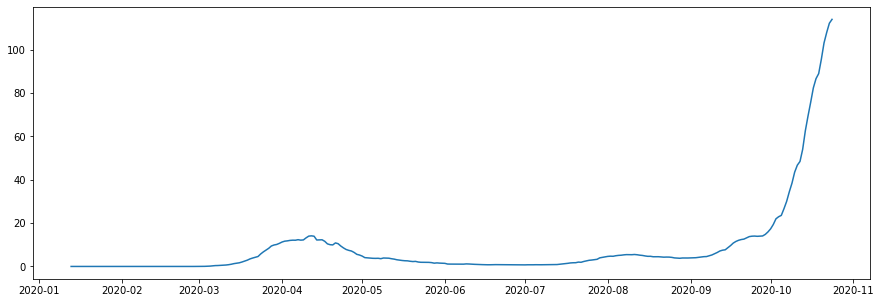

In [ ]:
plt.subplots(figsize=(15,5))
plt.plot(df_plot['dateRep'],df_plot['avg_number_cases_past_week_per_100000'],label = "Belgium")

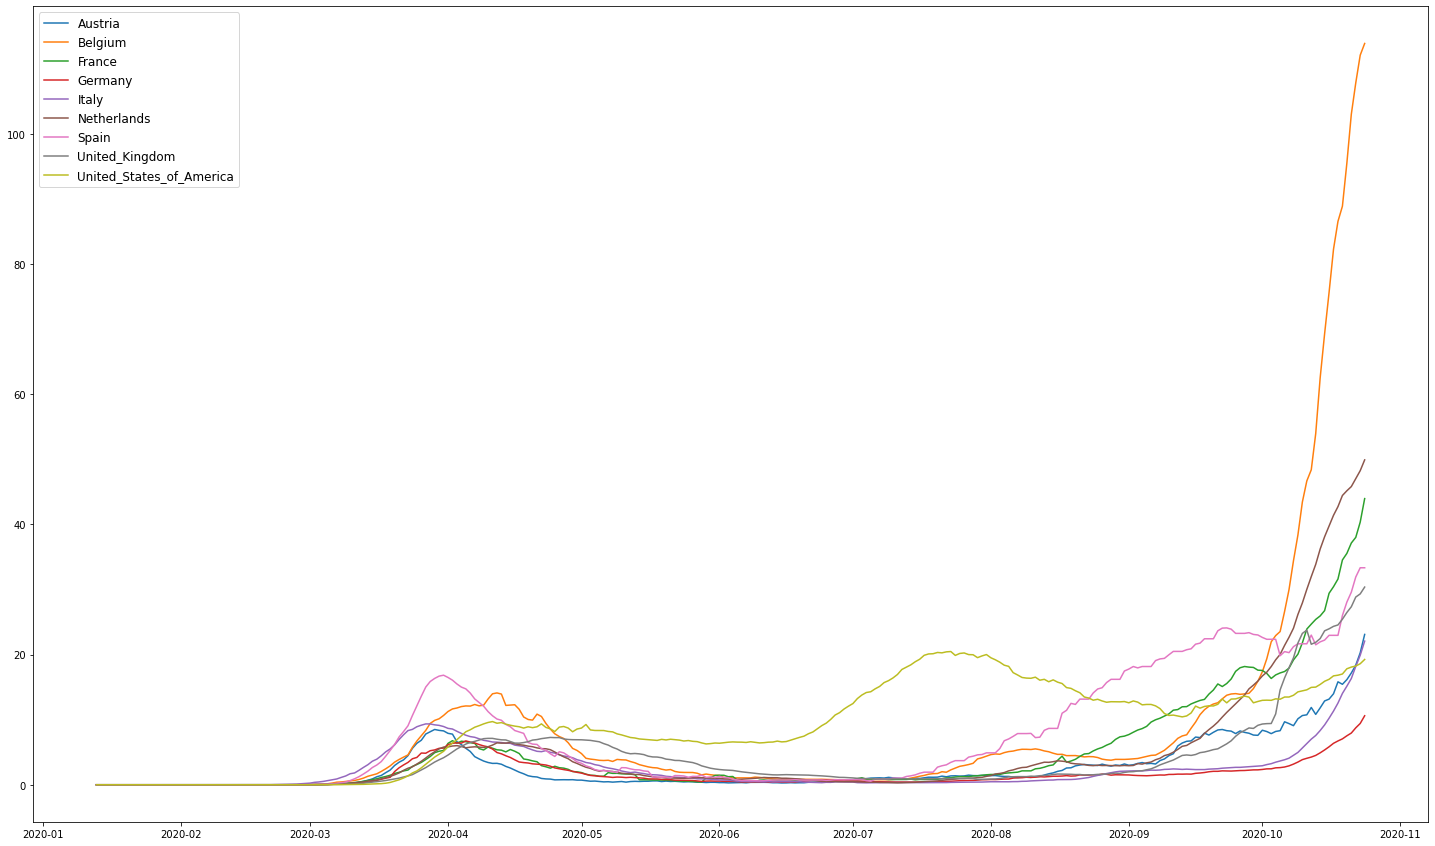

In [ ]:
# Now we are going to make this plot for each country in some_countries
plt.subplots(figsize=(25,15))

for c in some_countries:
  df_plot = extra.loc[extra['country'] == c,['dateRep','avg_number_cases_past_week_per_100000']]
  plt.plot(df_plot['dateRep'],df_plot['avg_number_cases_past_week_per_100000'],label = c)

plt.legend(loc='upper left',fontsize='large',frameon=True)


In [ ]:
# For the last part we only need the data from Belgium
covid_belgium = extra.loc[extra['country'] == 'Belgium']
covid_belgium.head()



,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day,rank,avg_number_cases_past_week,avg_number_cases_past_week_per_100000
4626,2020-10-24,10,2020,14560,85,Belgium,11455519.0,Europe,1314.623982,NaN,5,13052.000000,113.936348
4627,2020-10-23,10,2020,15085,53,Belgium,11455519.0,Europe,1240.423939,14560.0,3,12846.285714,112.140582
4628,2020-10-22,10,2020,16103,55,Belgium,11455519.0,Europe,1159.187986,15085.0,2,12357.857143,107.876886
4629,2020-10-21,10,2020,18574,47,Belgium,11455519.0,Europe,1046.691992,16103.0,1,11805.857143,103.058248
4630,2020-10-20,10,2020,15032,49,Belgium,11455519.0,Europe,961.318296,18574.0,4,10945.714286,95.549702


In [ ]:
# Calculate how many days since 01/03/2020 Belgium was in one of the following states
# avg_number_cases_past_week_per_100000 < 1 --> grey
# 1 <= avg_number_cases_past_week_per_100000 < 20 --> yellow
# 20 <= avg_number_cases_past_week_per_100000 < 60 --> light orange
# 60 <= avg_number_cases_past_week_per_100000 < 120 --> orange
# 120 <= avg_number_cases_past_week_per_100000 < 240 --> red
# 240 <= avg_number_cases_past_week_per_100000 < 400 --> deep red
# 400 <= avg_number_cases_past_week_per_100000 < 800 --> dark red
# 800 <= avg_number_cases_past_week_per_100000 < 1600 --> brown
# 1600 <= avg_number_cases_past_week_per_100000 --> black

def color_map(avg_number_cases_past_week_per_100000):
  if avg_number_cases_past_week_per_100000 < 1:
    return 'grey'
  elif avg_number_cases_past_week_per_100000 < 20:
    return 'yellow'
  elif avg_number_cases_past_week_per_100000 < 60:
    return 'light orange'
  elif avg_number_cases_past_week_per_100000 < 120:
    return 'orange'
  elif avg_number_cases_past_week_per_100000 < 240:
    return 'red'    
  elif avg_number_cases_past_week_per_100000 < 400:
    return 'deep red'
  elif avg_number_cases_past_week_per_100000 < 800:
    return 'dark red'
  elif avg_number_cases_past_week_per_100000 < 1600:
    return 'brown'
  else:
    return 'black'

covid_belgium['colorcode'] = covid_belgium.loc[:,'avg_number_cases_past_week_per_100000'].apply(color_map)
covid_belgium.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dateRep,month,year,cases,deaths,country,popData2019,continentExp,cum_number_14_days_cases_per_100000,cases_previous_day,rank,avg_number_cases_past_week,avg_number_cases_past_week_per_100000,colorcode
4626,2020-10-24,10,2020,14560,85,Belgium,11455519.0,Europe,1314.623982,NaN,5,13052.000000,113.936348,orange
4627,2020-10-23,10,2020,15085,53,Belgium,11455519.0,Europe,1240.423939,14560.0,3,12846.285714,112.140582,orange
4628,2020-10-22,10,2020,16103,55,Belgium,11455519.0,Europe,1159.187986,15085.0,2,12357.857143,107.876886,orange
4629,2020-10-21,10,2020,18574,47,Belgium,11455519.0,Europe,1046.691992,16103.0,1,11805.857143,103.058248,orange
4630,2020-10-20,10,2020,15032,49,Belgium,11455519.0,Europe,961.318296,18574.0,4,10945.714286,95.549702,orange


In [ ]:
# Exercise: Calculate how many days since 01/03/2020 Belgium was in one of the following states
covid_belgium[covid_belgium['dateRep'] >= '2020-03-01'].groupby('colorcode')['colorcode'].count()

colorcode
grey             44
light orange     11
orange           11
yellow          172
Name: colorcode, dtype: int64

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# We wonder if the number of deaths has an effect on the Belgian Consumer Confidence
# Read the file Belgian Consumer Confidence
consumer_confidence_data = pd.read_csv('/content/gdrive/My Drive/Belgian Consumer Confidence.csv', sep=";")
consumer_confidence_data.head()

,Year,Month,Consumer confidence indicator,Forecasts economic situation in Belgium (next 12 months),Forecasts unemployment in Belgium (next 12 months),Forecasts financial situation of households (next 12 months),Forecasts of savings of households (next 12 months)
0,2020,1,-6,-15,8,-2,2
1,2020,2,-4,-17,6,3,6
2,2020,3,-9,-28,16,1,8
3,2020,4,-26,-47,60,-6,9
4,2020,5,-23,-28,70,-2,7


In [ ]:
# Exercise: Calculate the total number of deaths per Year and Month in Belgium
covid_belgium_deaths = covid_belgium.groupby(['year', 'month'])['deaths'].sum().reset_index()
covid_belgium_deaths.head()

,year,month,deaths
0,2020,1,0
1,2020,2,0
2,2020,3,1168
3,2020,4,6605
4,2020,5,1576


In [ ]:
# Merge the previous dataframe with the consumer_confidence_data
covid_belgium_deaths_consumer_confidence =  pd.merge(covid_belgium_deaths, consumer_confidence_data,  how='inner', left_on=['year','month'], right_on = ['Year','Month'])
covid_belgium_deaths_consumer_confidence.head(10)

,year,month,deaths,Year,Month,Consumer confidence indicator,Forecasts economic situation in Belgium (next 12 months),Forecasts unemployment in Belgium (next 12 months),Forecasts financial situation of households (next 12 months),Forecasts of savings of households (next 12 months)
0,2020,1,0,2020,1,-6,-15,8,-2,2
1,2020,2,0,2020,2,-4,-17,6,3,6
2,2020,3,1168,2020,3,-9,-28,16,1,8
3,2020,4,6605,2020,4,-26,-47,60,-6,9
4,2020,5,1576,2020,5,-23,-28,70,-2,7
5,2020,6,278,2020,6,-19,-18,70,1,13
6,2020,7,79,2020,7,-20,-22,70,1,12
7,2020,8,185,2020,8,-26,-38,77,-1,12
8,2020,9,124,2020,9,-16,-20,62,2,17
9,2020,10,723,2020,10,-17,-20,59,1,1


In [ ]:
# Exercise: To keep a good overview: use .loc to get some of the data: 'year','month','deaths','Consumer confidence indicator'
covid_belgium_deaths_consumer_confidence[['year','month','deaths','Consumer confidence indicator']]

,year,month,deaths,Consumer confidence indicator
0,2020,1,0,-6
1,2020,2,0,-4
2,2020,3,1168,-9
3,2020,4,6605,-26
4,2020,5,1576,-23
5,2020,6,278,-19
6,2020,7,79,-20
7,2020,8,185,-26
8,2020,9,124,-16
9,2020,10,723,-17
